In [27]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.metrics import precision_score, accuracy_score

In [28]:
data = pd.read_csv('generated_data.csv')
data.tail(4)

,Unnamed: 0,Cpu Count,Cpu Working Time,Cpu idle Time,cpu_percent,Usage Cpu Count,number of software interrupts since boot,number of system calls since boot,number of interrupts since boot,cpu avg load over 1 min,...,time spent doing actual I/Os,number of bytes sent,number of bytes received,number of packets sent,number of packets recived,total number of errors while receiving,total number of errors while sending,total number of incoming packets which were dropped,total number of outgoing packets which were dropped,Boot_Time
14221,4221,4.0,271.31,121769.55,29.0,4.0,3502143.0,0.0,28397577.0,0.00,...,245300.0,8952405.0,65859929.0,41172.0,386740.0,0.0,0.0,2.0,0.0,8.31
14222,4222,4.0,271.80,122008.94,23.3,4.0,3513859.0,0.0,28406052.0,0.00,...,245636.0,8974390.0,65965912.0,41271.0,387453.0,0.0,0.0,2.0,0.0,8.32
14223,4223,4.0,272.11,122244.62,25.8,4.0,3521274.0,0.0,28412149.0,0.00,...,245816.0,8985909.0,66028574.0,41313.0,387914.0,0.0,0.0,2.0,0.0,8.33
14224,4224,4.0,279.90,122468.27,28.1,4.0,3559645.0,0.0,29596034.0,0.13,...,248452.0,9017199.0,66086888.0,41510.0,388364.0,0.0,0.0,2.0,0.0,8.34


In [29]:
data.drop(columns=['Unnamed: 0'], inplace=True)

# K-Means

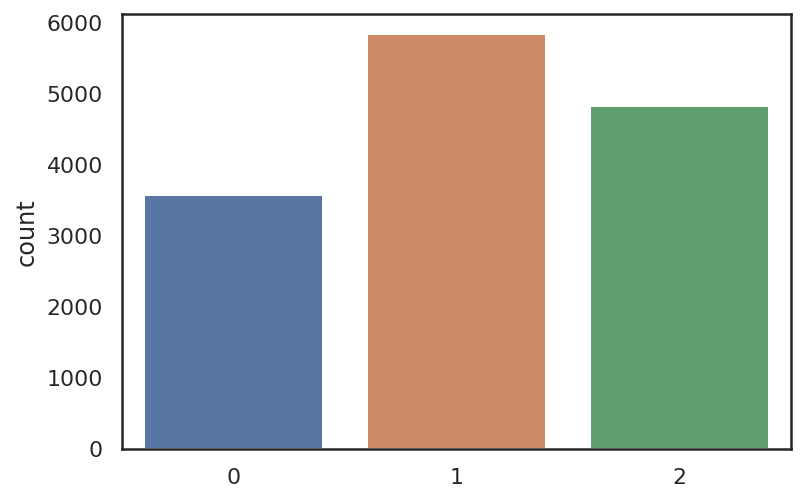

In [30]:
X = np.array(data)
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)
data['y'] = y_kmeans

sb.countplot(x=y_kmeans, data=data)

In [31]:
data.shape

(14225, 40)

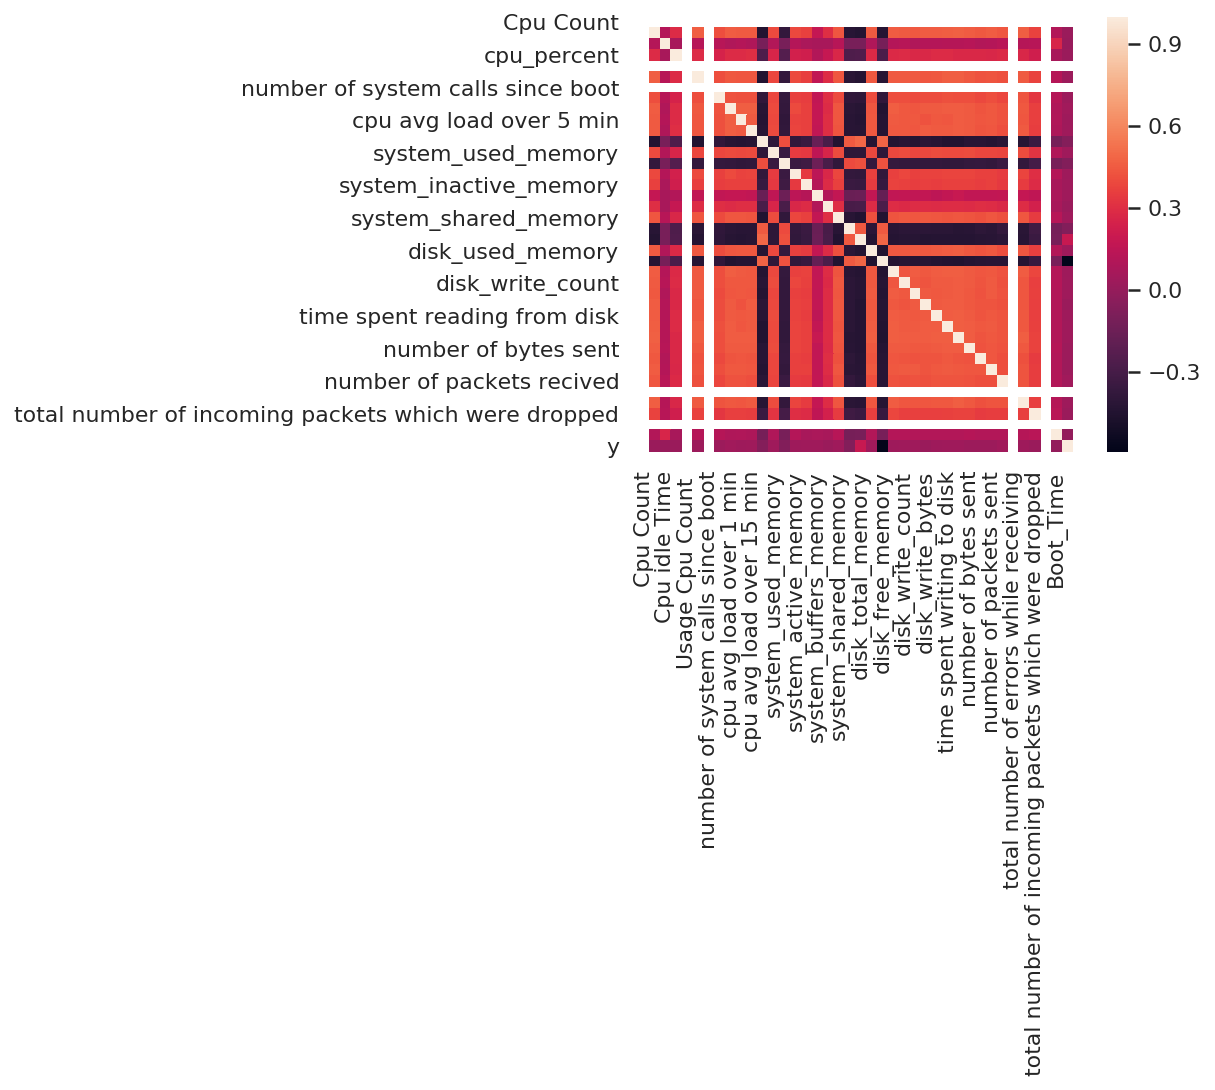

In [32]:
cor = data.corr()
sb.heatmap(cor, square=True)

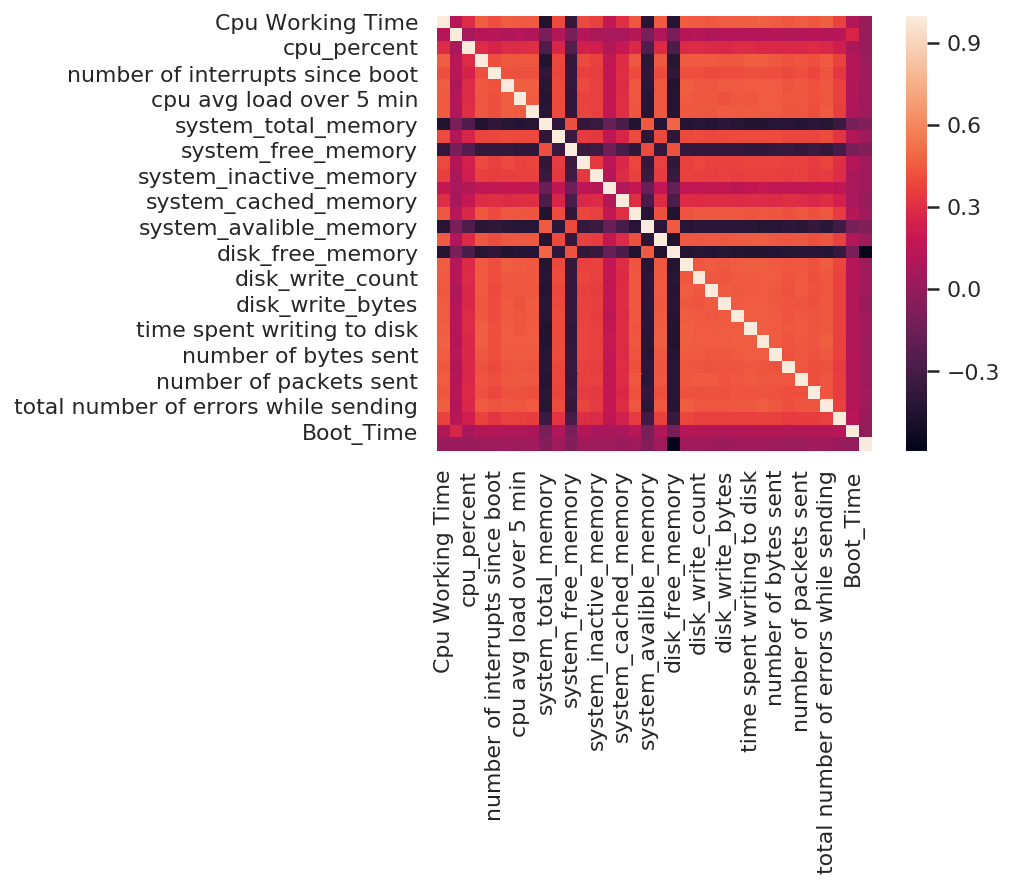

In [33]:
data.drop(columns=['total number of outgoing packets which were dropped'
                      ,'total number of errors while receiving', 'number of system calls since boot'
                      , 'Usage Cpu Count ', 'Cpu Count'
                       ,'total number of outgoing packets which were dropped', 'disk_total_memory'], inplace=True)

cor = data.corr()
sb.heatmap(cor, square=True)

In [37]:
X = data.drop(columns='y')
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [38]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

a = precision_score(y_pred, y_test, average=None)
accuracy = accuracy_score(y_pred, y_test)
cm, accuracy, a

(array([[ 696,  117,  140],
        [ 357, 1040,   13],
        [  60,    3, 1131]]),
 0.806016305875738,
 array([0.73032529, 0.73758865, 0.94723618]))

In [39]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_lr.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_pred, y_test)
a = precision_score(y_pred, y_test, average=None)
cm, accuracy, a

(array([[ 575,  192,  186],
        [ 284, 1077,   49],
        [  83,   11, 1100]]),
 0.773685690188361,
 array([0.60335782, 0.76382979, 0.92127303]))

In [40]:
 from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#     logistic_cm = 

#     from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
a = precision_score(y_pred, y_test, average=None)
cm, accuracy, a

(array([[ 794,   36,  123],
        [ 408,  993,    9],
        [  64,    0, 1130]]),
 0.8200730953050324,
 array([0.83315845, 0.70425532, 0.94639866]))